In [1]:
import dask.dataframe as dd


In [2]:

df = dd.read_csv("*.csv")
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [5]:
print('there are %s rows' % len(df.index))
print('there are %s columns' % len(df.columns))

there are 1956 rows
there are 5 columns


In [7]:
print('there are %s spam columns' % len(df[df.CLASS == 1]))
print('there are %s non-spam columns' % len(df[df.CLASS == 0]))

there are 1005 spam columns
there are 951 non-spam columns


In [28]:
print('there are %s rows that contain check' % len(df[df.CONTENT.str.lower().str.contains('check')]))
print('out of those instances that contain check %s are spam' % df[df.CONTENT.str.lower().str.contains('check')].CLASS.sum().compute())
print('leaving only 19 left that werent spam')
print('')
print('for a probability of %2f spam when the comment contains "check"' % df[df.CONTENT.str.lower().str.contains('check')].CLASS.mean().compute())

there are 480 rows that contain check
out of those instances that contain check 461 are spam
leaving only 19 left that werent spam

for a probability of 0.960417 spam when the comment contains "check"


In [37]:
# create visualizations here.

import matplotlib.pyplot as plt

df['content_length'] = df.CONTENT.str.len()

In [38]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,content_length
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39


In [43]:
df.groupby('CLASS').content_length.mean().compute()

CLASS
0     49.644585
1    137.336318
Name: content_length, dtype: float64

In [48]:
df.DATE = dd.to_datetime(df.DATE)

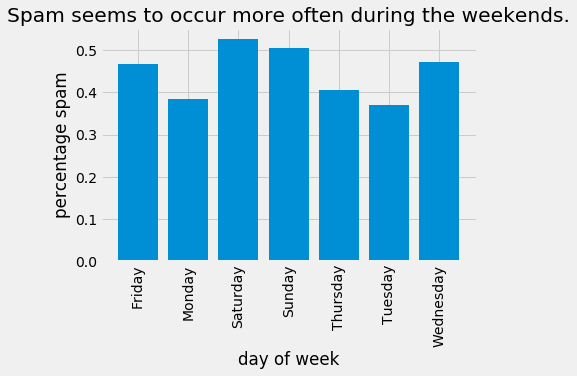

In [75]:
df['day_of_week'] = df.DATE.dt.dayofweek

plt.style.use('fivethirtyeight')
df.day_of_week = df.day_of_week.map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

plt.bar(df.groupby('day_of_week').CLASS.mean().compute().keys().tolist(), df.groupby('day_of_week').CLASS.mean().compute().values.tolist())
plt.xlabel('day of week')
plt.ylabel('percentage spam')
plt.title('Spam seems to occur more often during the weekends.')
plt.xticks(rotation='vertical');

You've been introduced to a variety of platforms (AWS SageMaker, AWS EMR, Databricks), libraries (Numba, Dask, MapReduce, Spark), and languages (Python, SQL, Scala, Java) that can "scale up" or "scale out" for faster processing of big data.

Write a paragraph comparing some of these technology options. For example, you could describe which technology you may personally prefer to use, in what circumstances, for what reasons.


Personally I find the AWS ecosystem the most interesting out of all of the topics we learned this week. I love the ease of setting up a SageMaker notebook, where I can then access powerful computing. 
But in general I think all of these different platforms/libraries/languages are useful in particular cases. For example, if i want to play around with a small dataset, it doesn't make sense to use SageMaker or really anything fancy beyond Jupyter notebooks and python. When dealing with bigger data for a similar goal, using our AWS credits it wouldn't be a bad idea to leverage the compute power that AWS offers, this includes libraries like Numbda or Dask that can help perform the task by partitioning the data.

Finally for data that is too big to fit on any one server we would want to leverage the power of spark, which could involve programming in Scala, but ultimately it is important to remember that these are tools at our disposal and not all tasks need to be done using the most powerful tools.
